### Set up the Environment

In [ ]:
from IPython.core.display import clear_output
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/requirements_tf_cert_exam.txt
clear_output()

In [ ]:
!wget https://raw.githubusercontent.com/rahulrajpr/references/main/helper_functions.py
clear_output()

> install the requirements

In [ ]:
!pip install -r requirements_tf_cert_exam.txt
!pip install split_folders
clear_output()

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import random
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy

In [ ]:
print(f'tensorflow version : {tf.__version__}')
print(f'pandas version : {pd.__version__}')
print(f'numpy version : {np.__version__}')
print(f'scipy version : {scipy.__version__}')

tensorflow version : 2.10.0
pandas version : 1.4.2
numpy version : 1.22.4
scipy version : 1.7.3


### Download the datset

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-04-03 06:08:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2023-04-03 06:08:44 (19.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



### Reading the Dataset & Slicing for the Required Dataset

In [ ]:
bc = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv', parse_dates = ['Date'])
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2787 entries, 0 to 2786
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Currency             2787 non-null   object        
 1   Date                 2787 non-null   datetime64[ns]
 2   Closing Price (USD)  2787 non-null   float64       
 3   24h Open (USD)       2787 non-null   float64       
 4   24h High (USD)       2787 non-null   float64       
 5   24h Low (USD)        2787 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 130.8+ KB


In [ ]:
bc.head(5)

,Currency,Date,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
0,BTC,2013-10-01,123.65499,124.30466,124.75166,122.56349
1,BTC,2013-10-02,125.45500,123.65499,125.75850,123.63383
2,BTC,2013-10-03,108.58483,125.45500,125.66566,83.32833
3,BTC,2013-10-04,118.67466,108.58483,118.67500,107.05816
4,BTC,2013-10-05,121.33866,118.67466,121.93633,118.00566


In [ ]:
bc = bc[['Date', 'Closing Price (USD)']]
bc.columns = ['date','price']
bc.set_index('date', inplace = True)
bc.sort_index()
bc.head(5)

,price
date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


### Plot the time series

In [ ]:
from helper_functions import plot_time_series

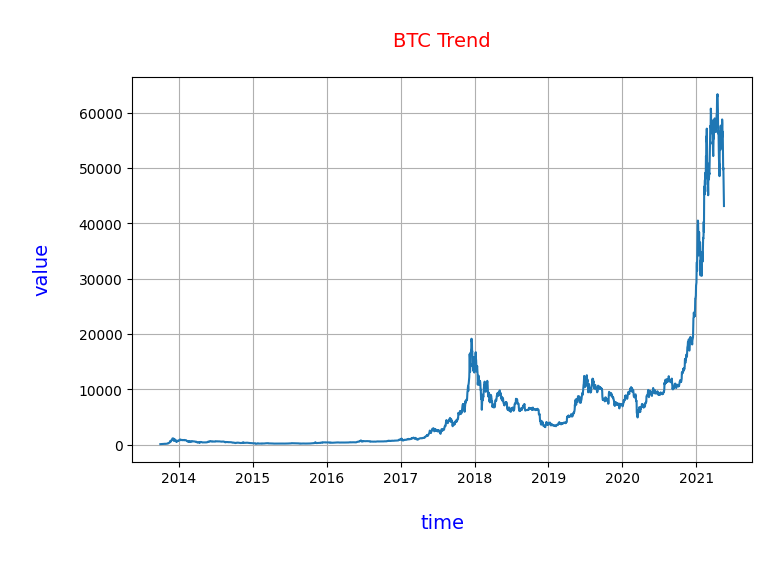

In [ ]:
plot_time_series(timesteps = bc.index, values = bc.price, title = 'BTC Trend', figsize = (8,5))

### Split Train Validation Sets

In [ ]:
training_size = int(len(bc)*0.8)

X_train = bc.index[:training_size]
y_train = bc.price[:training_size:]

X_val = bc.index[training_size:]
y_val = bc.price[training_size:]

len(X_train), len(y_train), len(X_val), len(y_val)

(2229, 2229, 558, 558)

In [ ]:
2229+558

2787

> Plot the train and test datasets

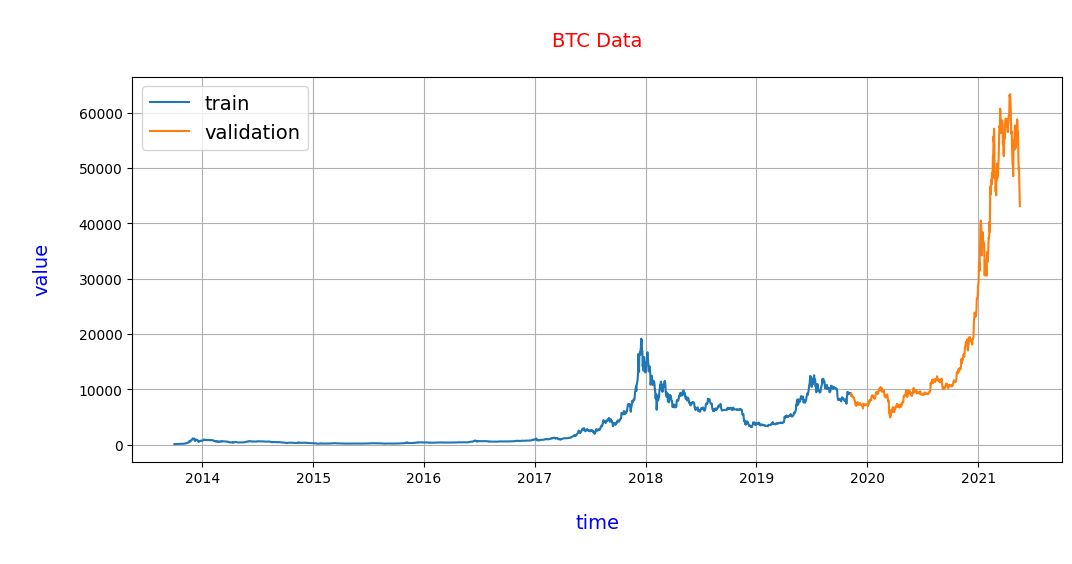

In [ ]:
plot_time_series(X_train, values = y_train, title = 'BTC Trend', label = 'train', figsize =(12,5))
plot_time_series(X_val, values = y_val, title = 'BTC Data', label = 'validation')

### Model 1 : Naive Model

In [ ]:
naive_forecast = y_val[:-1]

> plotting the niave forecaste

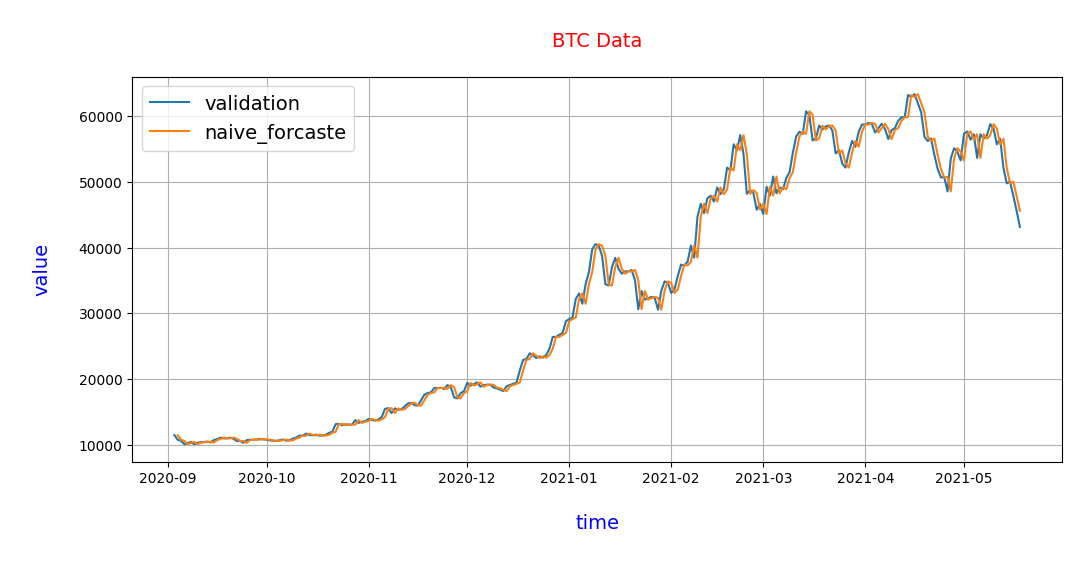

In [ ]:
offset = 300

plot_time_series(X_val, values = y_val, title = 'BTC Data', label = 'validation', figsize = (12,5),offset = offset)
plot_time_series(X_val[1:], values = naive_forecast, title = 'BTC Data', label = 'naive_forcaste', offset = offset)

> evaluate the performace of the naive model

In [ ]:
from helper_functions import calculate_results_regression

In [ ]:
results_0 = calculate_results_regression(y_true = y_val[1:], y_pred = naive_forecast)
results_0

{'mae': 567.9802, 'mse': 1147547.0, 'rmse': 1071.2362, 'mape': 2.5165248}

### Create windowed Dataset

In [ ]:
from helper_functions import windowed_times_series

In [ ]:
values = bc.price

features, labels = windowed_times_series(values = values, window = 7, horizon = 1)

features[:3], labels[:3]

window size : 7 & horizon_size : 1
number of windows returned : 2780



(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ]]),
 array([123.033  , 124.049  , 125.96116]))

### Split the windowed dataset into Train and Validation set

In [ ]:
train_size = int(len(features)*0.8)

train_features = features[:train_size]
train_labels = labels[:train_size]

val_features = features[train_size:]
val_labels = labels[train_size:]

len(train_features), len(train_labels), len(val_features), len(val_labels)

(2224, 2224, 556, 556)

In [ ]:
2224+556

2780

### Create Model checkpoints

In [ ]:
from helper_functions import create_model_checkpoint

### Create Data pipeline (tf.data.Dataset)

> tensorflow dataset

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels))

train_ds, val_ds

(<TensorSliceDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(7,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>)

> batch the dataset

In [ ]:
batch_size = 32
buffer_size = int(0.1*len(train_features))

train_ds = train_ds.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds, val_ds

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 7), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

Model 1:

Dense Model -- windows : 7, horizon : 1

In [ ]:
train_features.shape[1]

7

In [ ]:
from tensorflow.keras import layers

In [ ]:
tf.random.set_seed(42)

inputs = tf.keras.Input(shape = [7], name = 'input_layer')
x = layers.Dense(units = 124, activation = 'relu')(inputs)
outputs = layers.Dense(units = 1, activation = 'linear')(x)

model_1 = tf.keras.Model(inputs, outputs, name = 'model_1')

model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_1.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 124)               992       
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_1 = model_1.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds),
                        callbacks = [create_model_checkpoint(model_name = model_1.name, monitor = 'val_mae')])

Epoch 1/100
70/70 [==============================] - 1s 7ms/step - loss: 205.9946 - mae: 205.9946 - val_loss: 861.0624 - val_mae: 861.0624
Epoch 2/100
70/70 [==============================] - 0s 4ms/step - loss: 146.5318 - mae: 146.5318 - val_loss: 869.9449 - val_mae: 869.9449
Epoch 3/100
70/70 [==============================] - 0s 4ms/step - loss: 131.0015 - mae: 131.0015 - val_loss: 796.6241 - val_mae: 796.6241
Epoch 4/100
70/70 [==============================] - 0s 4ms/step - loss: 132.9011 - mae: 132.9011 - val_loss: 662.7082 - val_mae: 662.7082
Epoch 5/100
70/70 [==============================] - 0s 4ms/step - loss: 137.1236 - mae: 137.1236 - val_loss: 735.0540 - val_mae: 735.0540
Epoch 6/100
70/70 [==============================] - 0s 4ms/step - loss: 122.1276 - mae: 122.1276 - val_loss: 744.7805 - val_mae: 744.7805
Epoch 7/100
70/70 [==============================] - 0s 4ms/step - loss: 130.3589 - mae: 130.3589 - val_loss: 624.5382 - val_mae: 624.5382
Epoch 8/100
70/70 [========

In [ ]:
model_1.load_weights('checkpoints/model_1.h5')

In [ ]:
model_1.evaluate(val_ds)

18/18 [==============================] - 0s 1ms/step - loss: 566.3784 - mae: 566.3784


[566.37841796875, 566.37841796875]

In [ ]:
pred_1 = np.squeeze(model_1.predict(val_ds))
pred_1

18/18 [==============================] - 0s 1ms/step


array([ 8840.996 ,  8789.227 ,  9047.91  ,  8773.589 ,  8760.193 ,
        8752.02  ,  8672.329 ,  8518.833 ,  8469.599 ,  8532.376 ,
        8244.259 ,  8122.896 ,  8073.048 ,  7677.769 ,  7332.7544,
        7292.657 ,  7095.1226,  7222.7266,  7158.988 ,  7491.0957,
        7422.751 ,  7713.5117,  7585.5234,  7412.094 ,  7343.7646,
        7317.91  ,  7225.6333,  7380.3047,  7510.604 ,  7546.1367,
        7564.3516,  7367.4395,  7253.4556,  7201.2744,  7189.9277,
        7235.504 ,  7105.976 ,  7112.8564,  6908.9067,  6617.625 ,
        7335.24  ,  7195.2915,  7162.4844,  7284.3003,  7258.9673,
        7187.7847,  7233.8423,  7224.468 ,  7195.163 ,  7229.772 ,
        7312.7104,  7391.3633,  7277.8364,  7194.764 ,  7179.8594,
        6979.9043,  7257.4404,  7344.038 ,  7362.088 ,  7695.3145,
        8036.915 ,  8102.281 ,  7862.7183,  8076.204 ,  8099.908 ,
        8158.809 ,  8134.124 ,  8691.102 ,  8869.476 ,  8758.789 ,
        8929.334 ,  8964.1045,  8688.142 ,  8654.529 ,  8706.1

In [ ]:
def pred_and_evaluate(model,val_ds):
  pred = model.predict(val_ds)
  pred = np.squeeze(pred)
  y_true = np.array([x.numpy() for x in val_ds.unbatch().map(lambda x,y : y)])
  results = calculate_results_regression(y_true = y_true, y_pred = pred)
  return results

In [ ]:
results_1 = pred_and_evaluate(model_1, val_ds)
results_1

18/18 [==============================] - 0s 2ms/step


{'mae': 566.37854, 'mse': 1161273.9, 'rmse': 1077.6241, 'mape': 2.5253}

> plot the results of moel-1

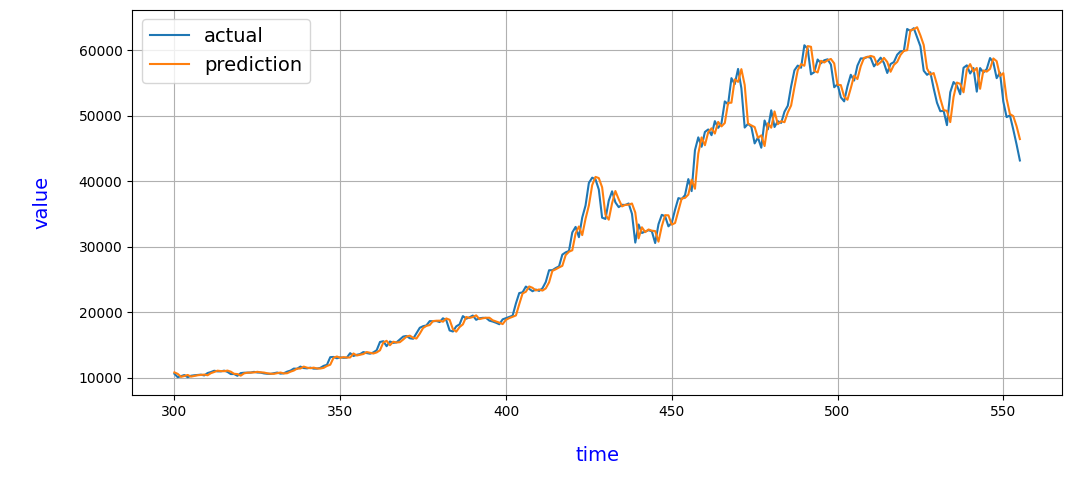

In [ ]:
plot_time_series(timesteps = pd.Series(val_labels).index, values = val_labels, label = 'actual', figsize = (12,5), offset = 300)
plot_time_series(timesteps = pd.Series(val_labels).index, values = pred_1, label = 'prediction', offset = 300)

### Model 2 

Dense : windows : 30, horizon = 1

> prepare the windowed dataset

In [ ]:
features_30_1, labels_30_1 = windowed_times_series(values = bc.price, window = 30, horizon = 1)

window size : 30 & horizon_size : 1
number of windows returned : 2757



> prepare train-val split

In [ ]:
train_size_30_1 = int(0.8*len(features_30_1))

train_features_30_1 = features_30_1[:train_size_30_1]
train_labels_30_1 = labels_30_1[:train_size_30_1]

val_features_30_1 = features_30_1[train_size_30_1:]
val_labels_30_1 = labels_30_1[train_size_30_1:]

> prepare the data pipeline

In [ ]:
train_ds_30_1 = tf.data.Dataset.from_tensor_slices((train_features_30_1, train_labels_30_1))
val_ds_30_1 = tf.data.Dataset.from_tensor_slices((val_features_30_1, val_labels_30_1))

train_ds_30_1, val_ds_30_1

(<TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.float64, name=None))>)

In [ ]:
batch_size = 32
buffer_size = int(0.1*len(train_features))

train_ds_30_1 = train_ds_30_1.shuffle(buffer_size).batch(batch_size).prefetch(tf.data.AUTOTUNE)
val_ds_30_1 = val_ds_30_1.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_ds_30_1, val_ds_30_1

(<PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None, 30), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>)

> build the model

In [ ]:
tf.random.set_seed(42)

inputs = tf.keras.Input(shape = [30], name = 'input_layer')
x = layers.Dense(units = 124, activation = 'relu')(inputs)
outputs = layers.Dense(units = 1, activation = 'linear')(x)

model_2 = tf.keras.Model(inputs, outputs, name = 'model_2')

model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

model_2.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 30)]              0         
                                                                 
 dense_2 (Dense)             (None, 124)               3844      
                                                                 
 dense_3 (Dense)             (None, 1)                 125       
                                                                 
Total params: 3,969
Trainable params: 3,969
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history_2 = model_2.fit(train_ds_30_1,
                        epochs = 100,
                        steps_per_epoch = len(train_ds_30_1),
                        validation_data = val_ds_30_1,
                        validation_steps = len(val_ds_30_1),
                        callbacks = [create_model_checkpoint(model_name = model_2.name, monitor = 'val_mae')])

In [ ]:
model_2.load_weights('checkpoints/model_2.h5')

In [ ]:
model_2.evaluate(val_ds_30_1)

18/18 [==============================] - 0s 2ms/step - loss: 597.6832 - mae: 597.6832


[597.6832275390625, 597.6832275390625]

In [ ]:
results_2 = pred_and_evaluate(model_2, val_ds = val_ds_30_1)
results_2

18/18 [==============================] - 0s 1ms/step


{'mae': 597.6832, 'mse': 1238871.6, 'rmse': 1113.0461, 'mape': 2.7378154}

In [ ]:
pred_2 = np.squeeze(model_2.predict(val_ds_30_1))
pred_2

actual_2 = np.array([x.numpy() for x in val_ds_30_1.unbatch().map(lambda x,y : y)])

18/18 [==============================] - 0s 2ms/step


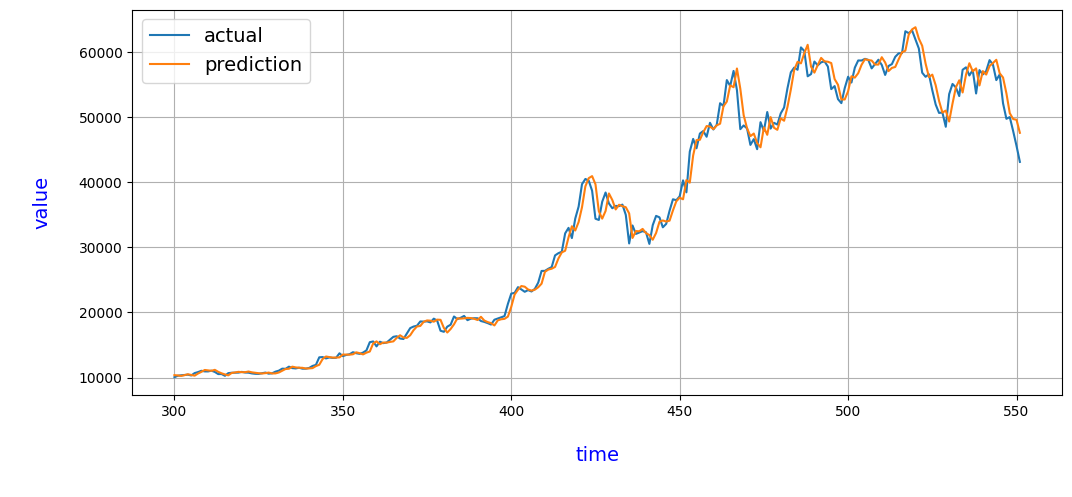

In [ ]:
plot_time_series(timesteps = pd.Series(actual_2).index, values = actual_2, label = 'actual', figsize = (12,5), offset = 300)
plot_time_series(timesteps = pd.Series(actual_2).index, values = pred_2, label = 'prediction', offset = 300)

### Compare model till now

In [ ]:
all_results = pd.DataFrame({'naive_model': results_0,
                            model_1.name : results_1,
                            model_2.name : results_2}).transpose()

all_results.sort_values(by = 'mae', ascending = True, inplace = True)
all_results 

,mae,mse,rmse,mape
model_1,566.378540,1161273.875,1077.624146,2.525300
naive_model,567.980225,1147547.000,1071.236206,2.516525
model_2,597.683228,1238871.625,1113.046143,2.737815


Till now, model 1 seems good

### Model 3

- Adding convolutions into the model 1

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
from helper_functions import reduce_learning_rate_callback

In [ ]:
model_3 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Flatten(),
  layers.Dense(1)
], name="model_3")

# Compile model
model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [ ]:
history_3 = model_3.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds), 
                        callbacks = [create_model_checkpoint(model_name = model_3.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 8)])

In [ ]:
model_3.load_weights('checkpoints/model_3.h5')

In [ ]:
results_3 = pred_and_evaluate(model_3, val_ds = val_ds)
results_3

18/18 [==============================] - 0s 2ms/step


{'mae': 573.64386, 'mse': 1193698.2, 'rmse': 1092.565, 'mape': 2.57283}

Model : LSTM

- LSTM

In [ ]:
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.LSTM(units=128, activation = 'relu'),
  layers.Dense(1)
], name="model_4")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics = ['mae'])

In [ ]:
history_4 = model_4.fit(train_ds,
                        epochs = 100,
                        steps_per_epoch = len(train_ds),
                        validation_data = val_ds,
                        validation_steps = len(val_ds), 
                        callbacks = [create_model_checkpoint(model_name = model_4.name, monitor = 'val_mae'),
                                     reduce_learning_rate_callback(monitor = 'val_mae', patience = 8)])

In [ ]:
model_4.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda_19 (Lambda)          (None, 1, 7)              0         
                                                                 
 lstm_2 (LSTM)               (None, 128)               69632     
                                                                 
 dense_28 (Dense)            (None, 1)                 129       
                                                                 
Total params: 69,761
Trainable params: 69,761
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_4.load_weights('checkpoints/model_4.h5')

In [ ]:
results_4 = pred_and_evaluate(model_4, val_ds = val_ds)
results_4

18/18 [==============================] - 0s 2ms/step


{'mae': 569.6325, 'mse': 1181117.6, 'rmse': 1086.7924, 'mape': 2.5485497}

### Comapare all the results

In [ ]:
all_results = pd.DataFrame({'naive_model': results_0,
                            model_1.name : results_1,
                            model_2.name : results_2,
                            model_3.name : results_3,
                            model_4.name : results_4}).transpose()

all_results.sort_values(by = 'mae', ascending = True, inplace = True)
all_results 

,mae,mse,rmse,mape
model_1,566.378540,1161273.875,1077.624146,2.525300
naive_model,567.980225,1147547.000,1071.236206,2.516525
model_4,569.632507,1181117.625,1086.792358,2.548550
model_3,573.643860,1193698.250,1092.564941,2.572830
model_2,597.683228,1238871.625,1113.046143,2.737815


looks like model_1 stands tall

In [ ]:
model_1.save('best_model.h5')

In [ ]:
loaded_best_model = tf.keras.models.load_model('best_model.h5')

In [ ]:
loaded_best_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 7)]               0         
                                                                 
 dense (Dense)               (None, 124)               992       
                                                                 
 dense_1 (Dense)             (None, 1)                 125       
                                                                 
Total params: 1,117
Trainable params: 1,117
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loaded_best_model.evaluate(val_ds)

18/18 [==============================] - 1s 6ms/step - loss: 566.3784 - mae: 566.3784


[566.37841796875, 566.37841796875]

This is the End of the Notebook